In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [32]:
file_path = 'C:\\Users\\Asus\\Desktop\\FİNALÖDEVİ\\VeriSeti.csv'
data = pd.read_csv(file_path)

In [33]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

In [34]:
data[columns_with_zeros] = data[columns_with_zeros].fillna(data[columns_with_zeros].median())


In [35]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
param_grid = {'n_neighbors': np.arange(1, 31)}

In [39]:
knn = KNeighborsClassifier()

In [40]:
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [41]:
best_k = grid_search.best_params_['n_neighbors']


In [42]:
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [43]:
y_pred = knn_optimized.predict(X_test_scaled)
y_pred_proba = knn_optimized.predict_proba(X_test_scaled)[:, 1]

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

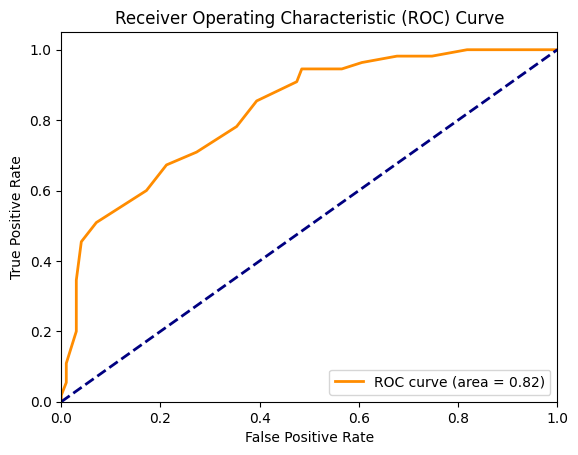

In [45]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc:.2f}')

Confusion Matrix:
[[82 17]
 [22 33]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.83      0.81        99
    Diabetes       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

ROC AUC: 0.82
